# 2.1. Построение простого стационарного решения уравнения фильтрации

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Версия 0.1 от 03.10.2023

Хабибуллин Ринат 2023 г.

---

# 1. Формула Дюпюи и построение простых решений с python <a class="anchor" id="10.1"></a>
Простое решение для задачи стационарного притока к вертикальной скважине в однородном изотропном пласте круговой формы с постоянным давлением на границе имеет вид

$$Q=\dfrac{kh}{18.41\mu B} \dfrac{P_{res}-P_{wf}}{\ln \dfrac{r_e}{r_w} + S}
\tag{1}$$

где 

где в свою очередь 
* $Q$ - дебит скважины на поверхности, приведенный к нормальным условиям, ст. м$^3$/сут
* $\mu$ - вязкость нефти в пласте, сП
* $B$ - объемный коэффициент нефти, м$^3$/м$^3$
* $P_{res}$ - пластовое давление или давление на контуре с радиусом $r_e$, атма
* $P_{wf}$ - давление забойное, атма
* $k$ - проницаемость, мД
* $h$ - мощность пласта, м
* $r_e$ - внешний контур дренирования скважины, м
* $r_w$ - радиус скважины, м
* $S$ - скин-фактор скважины, м

Это решение известно как [закон Дарси](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%94%D0%B0%D1%80%D1%81%D0%B8) или [формула Дюпюи](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D1%81%D1%82%D1%8C_(%D0%BD%D0%B5%D1%84%D1%82%D0%B5%D0%B4%D0%BE%D0%B1%D1%8B%D1%87%D0%B0)).

Выражение можно переписать в виде

$$P_{r} = P_{res} - 18.41\dfrac{ Q\mu B }{kh} \left[ \ln\dfrac{r_e}{r} +S \right]
\tag{2}$$

который удобен для расчета распределения давления в пласте $P_r$ на произвольном расстоянии от скважины $r$

In [1]:
# импортируем библиотеки для расчетов

# numpy используем для работы с массивами и подготовки данных для построения графиков. 
# Также в некоторых функциях используем возможности векторных расчетов numpy
import numpy as np

# matplotlib используем для построения графиков
import matplotlib.pyplot as plt

# plotly используем как альтернативный инструмент построения графиков
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Для удобства дальнейшего изложения и использования расчетных функций при создании функций и переменных на языке python
названия формируются по следующим принципам:
* сначала указывается, что расчитывается в функции, в данном случае - давление $p$
* потом указываются пояснения - в данном случае p_ss - steady state pressure
* в конце указывается размерность в которой ожидается получаение ответа - в данном случае atma - абсолютные атмосферы

In [2]:
def p_ss_atma(p_res_atma = 250,
              q_liq_sm3day = 50,
              mu_cP = 1,
              B_m3m3 = 1.2,
              k_mD = 40,
              h_m = 10,
              r_e = 240,
              r = 0.1):
  """
  функция расчета давления в произвольной точке пласта для стационарного решения 
  уравнения фильтрации 
  p_res_atma - пластовое давление, давление на контуре питания
  q_liq_sm3day - дебит жидкости на поверхности в стандартных условиях
  mu_cP - вязкость нефти (в пластовых условиях)
  B_m3m3 - объемный коэффициент нефти 
  k_mD - проницаемость пласта
  h_m - мощность пласта
  r_e - радиус контрура питания 
  r - расстояние на котором проводится расчет
  """
  return p_res_atma - 18.41 * q_liq_sm3day*mu_cP*B_m3m3/k_mD/h_m * np.log(r_e/r)


## 2. Построение графика с использованием **matplotlib** 

Самый простой пример построения графиков в python - использование библиотеки matplotlib.

Построим график распределения давления в пласте - воронку депресси ориентируясь на выражение (10.2).

Для формирования графика требуется создать два массива значений - x и y и отобразить их. Для формирования массива используются методы библиотеки numpy.

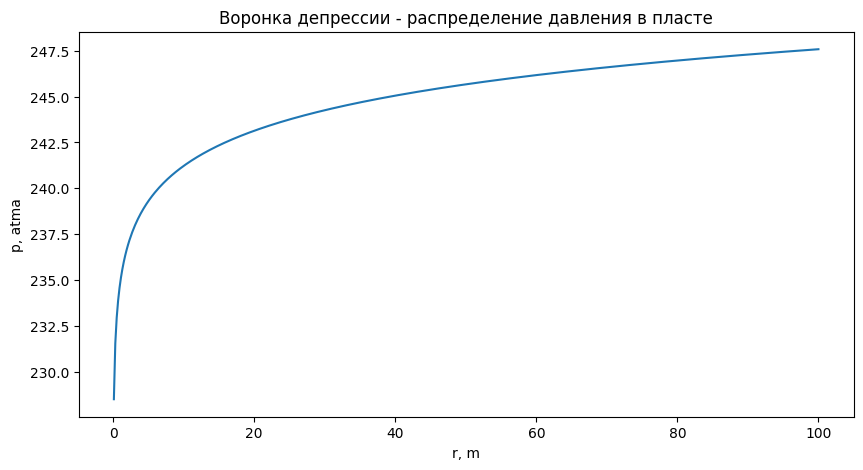

In [3]:
# формируем массив расстояний для которых будем проводить расчет
r_arr = np.linspace(0.1, 100, 500) 

# рассчитываем массив давлений на соответствующих расстояниях
# для расчета используется векторный расчет numpy - нет необходимости делать цикл в явном виде
p_arr = p_ss_atma(r=r_arr)

# настраиваем отображение графика
plt.rcParams["figure.figsize"] = (10,5)  # регулируем размер графика

plt.plot(r_arr, p_arr)   # команда отрисовки графика по заданным массивам

plt.title('Воронка депрессии - распределение давления в пласте')
plt.xlabel('r, m')
plt.ylabel('p, atma')
plt.show()

## 3. Построение карты давлений с использованием matplotlib 
Построим карту пластовых давлений с использованием формулы Дюпюи. 

Для построения карты необходимо рассчитать значения давления на регулярной сетке, что можно сделать с использованием функции `np.meshgrid`

Для построения карты полезно вспомнить, что расстояние от скважины с координатами $(x_{well}, y_{well})$ до произвольной точки пласта с координатами $(x,y)$ можно найти по формуле 
$$r=\sqrt{ (x-x_{well})^2 + (y-y_{well})^2 }
\tag{3}$$

In [4]:
# зададим параметры воронки депрессии
pres = 250 
r_e = 300

# зададим координатную сетку основываясь на параметрах
x = np.linspace(-r_e, r_e, 300)
y = np.linspace(-r_e, r_e, 300)
# рассчитаем вспомогательные вектора для построения сетки
xv, yv = np.meshgrid(x, y)
# зададим координаты скважины
xwell1 = 0
ywell1 = 0
# рассчитаем значение давлений во всех точках сетки
p_mesh = p_ss_atma(r=((xv-xwell1)**2 + (yv-ywell1)**2)**0.5, p_res_atma=pres, r_e=r_e)
# удалим значения за контуром, так как в данном случае они не имеют смысла
p_mesh[np.where(p_mesh > pres)] = pres

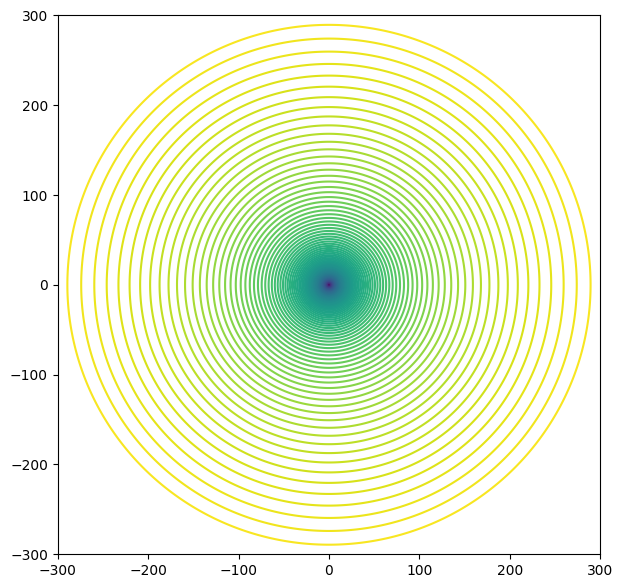

In [5]:
# построим отображение в виде контурной карты
plt.rcParams["figure.figsize"] = (7,7)
plt.contour(x, y, p_mesh, levels=100)
plt.show()

Интересно отметить, что для стационарного решения работает принцип суперпозиции - сумма двух решений также будет решением, это позволяет построить карту для нескольких скважин

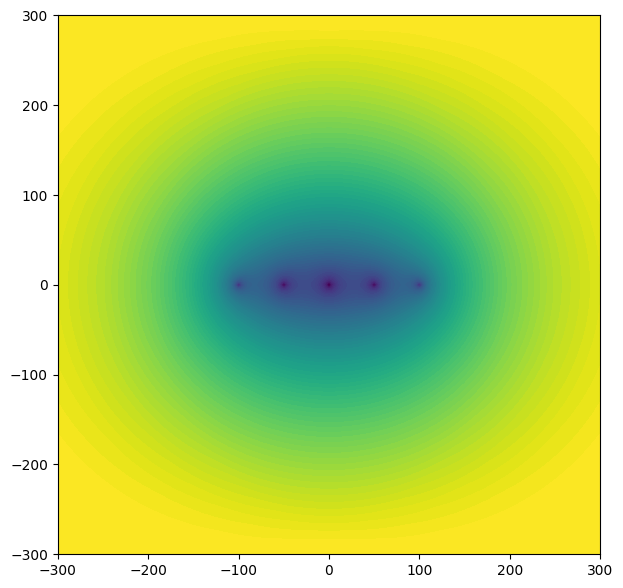

In [6]:
# зададим параметры воронки депрессии
pres = 250 
r_e = 300

# зададим координатную сетку основываясь на параметрах
x = np.linspace(-r_e, r_e, 300)
y = np.linspace(-r_e, r_e, 300)
# рассчитаем вспомогательные вектора для построения сетки
xv, yv = np.meshgrid(x, y)

# зададим координаты скважины (всего будет 5 скважин у которых меняется только х координата)
xwell = [-100, -50, 0 , 50, 100]
ywell = 0

# зададим пустой список сеток с перепадами давлений от каждой отдельной скважины
p_mesh_i=[]

# для каждой скважины найдем ее влияние на давления
for xi in xwell:
    # рассчитаем значение давлений во всех точках сетки для скважины i
    p_mesh_i_ = p_ss_atma(r=((xv-xi)**2 + (yv-ywell)**2)**0.5, p_res_atma=pres, r_e=r_e)
    # удалим значения за контуром, так как в данном случае они не имеют смысла
    p_mesh_i_[np.where(p_mesh_i_ > pres)] = pres
    p_mesh_i.append(p_mesh_i_)
    
# найдем суммарное влияние все скважин
p_mesh_sum = 0
for p_mesh_i_ in p_mesh_i:
    # найдем сумму решений, помним что суммировать можно депрессии
    p_mesh_sum = pres - p_mesh_i_ + p_mesh_sum
p_mesh_sum = pres -  p_mesh_sum

# построим отображение в виде контурной карты
plt.rcParams["figure.figsize"] = (7,7)
plt.contourf(x, y, p_mesh_sum, levels=100)
plt.show()